In [119]:
pip install --upgrade scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 60.7 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.22.0 requires google-cloud-bigquery[bqstorage,pandas]>=3.10.0, but you have google-cloud-bigquery 2.34.4 which is incompatible.
bigframes 0.22.0 requires google-cloud-storage>=2.0.0, but you have google-cloud-storage 1.44.0 which is incompatible.
bigframes 0.22.0 requires pandas<2.1.4,>=1.5.0, but you have pandas 2.2.2 which is incompatible.
dataproc-jupyter-plugin 0.1.79 requires pydantic~=1.10.0, but you have pydantic 2.8.2 which is incompatible.
spaghetti 1.7.6 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatibl

In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR


In [160]:
# Load the dataset
file_path = '/kaggle/input/fuel-consumption/Fuel_Consumption_2000-2022.csv'
data = pd.read_csv(file_path)

In [161]:
data.shape

(22556, 13)

In [162]:
# Display the first few rows of the dataset
print(data.head())

   YEAR   MAKE    MODEL VEHICLE CLASS  ENGINE SIZE  CYLINDERS TRANSMISSION  \
0  2000  ACURA    1.6EL       COMPACT          1.6          4           A4   
1  2000  ACURA    1.6EL       COMPACT          1.6          4           M5   
2  2000  ACURA    3.2TL      MID-SIZE          3.2          6          AS5   
3  2000  ACURA    3.5RL      MID-SIZE          3.5          6           A4   
4  2000  ACURA  INTEGRA    SUBCOMPACT          1.8          4           A4   

  FUEL  FUEL CONSUMPTION  HWY (L/100 km)  COMB (L/100 km)  COMB (mpg)  \
0    X               9.2             6.7              8.1          35   
1    X               8.5             6.5              7.6          37   
2    Z              12.2             7.4             10.0          28   
3    Z              13.4             9.2             11.5          25   
4    X              10.0             7.0              8.6          33   

   EMISSIONS  
0        186  
1        175  
2        230  
3        264  
4        198  


In [163]:
# Basic statistics and info about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22556 entries, 0 to 22555
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              22556 non-null  int64  
 1   MAKE              22556 non-null  object 
 2   MODEL             22556 non-null  object 
 3   VEHICLE CLASS     22556 non-null  object 
 4   ENGINE SIZE       22556 non-null  float64
 5   CYLINDERS         22556 non-null  int64  
 6   TRANSMISSION      22556 non-null  object 
 7   FUEL              22556 non-null  object 
 8   FUEL CONSUMPTION  22556 non-null  float64
 9   HWY (L/100 km)    22556 non-null  float64
 10  COMB (L/100 km)   22556 non-null  float64
 11  COMB (mpg)        22556 non-null  int64  
 12  EMISSIONS         22556 non-null  int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 2.2+ MB
None


In [164]:
data.describe()

,YEAR,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
count,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000
mean,2011.554442,3.356646,5.854141,12.763513,8.919126,11.034341,27.374534,250.068452
std,6.298269,1.335425,1.819597,3.500999,2.274764,2.910920,7.376982,59.355276
min,2000.000000,0.800000,2.000000,3.500000,3.200000,3.600000,11.000000,83.000000
25%,2006.000000,2.300000,4.000000,10.400000,7.300000,9.100000,22.000000,209.000000
50%,2012.000000,3.000000,6.000000,12.300000,8.400000,10.600000,27.000000,243.000000
75%,2017.000000,4.200000,8.000000,14.725000,10.200000,12.700000,31.000000,288.000000
max,2022.000000,8.400000,16.000000,30.600000,20.900000,26.100000,78.000000,608.000000


In [165]:
# Display the number of rows and columns
print(f"Number of rows: {data.shape[0]}")
print(f"Number of columns: {data.shape[1]}")

Number of rows: 22556
Number of columns: 13


In [166]:
# Check for missing values
print(data.isnull().sum())

YEAR                0
MAKE                0
MODEL               0
VEHICLE CLASS       0
ENGINE SIZE         0
CYLINDERS           0
TRANSMISSION        0
FUEL                0
FUEL CONSUMPTION    0
HWY (L/100 km)      0
COMB (L/100 km)     0
COMB (mpg)          0
EMISSIONS           0
dtype: int64


In [167]:
data.duplicated().sum()

1

In [168]:
data.drop_duplicates(inplace=True)

In [169]:
# Select important features and target
features = ['ENGINE SIZE', 'CYLINDERS', 'TRANSMISSION', 'FUEL']
target = 'FUEL CONSUMPTION'

# Separate input features (X) and target (y)
X = data[features]
y = data[target]

<Axes: xlabel='ENGINE SIZE', ylabel='EMISSIONS'>

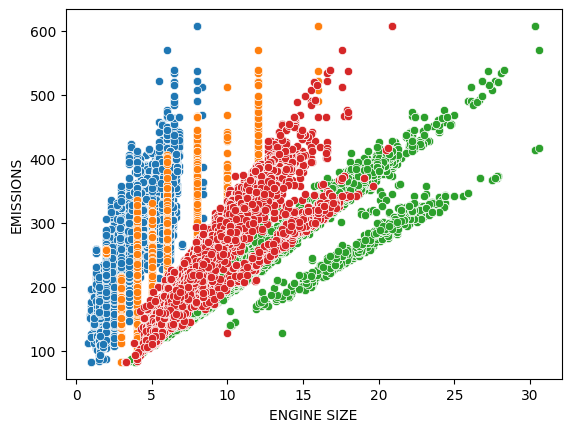

In [170]:
# Create scatterplots for each column against CO2 EMISSIONS
sns.scatterplot(x='ENGINE SIZE', y='EMISSIONS', data=data)
sns.scatterplot(x='CYLINDERS', y='EMISSIONS', data=data)
sns.scatterplot(x='FUEL CONSUMPTION', y='EMISSIONS', data=data)
sns.scatterplot(x='HWY (L/100 km)', y='EMISSIONS', data=data)

In [171]:
# Preprocessing for numerical and categorical data
numeric_features = ['ENGINE SIZE', 'CYLINDERS']
categorical_features = ['TRANSMISSION', 'FUEL']

# Create transformers for preprocessing
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')

In [173]:
# Create transformers for preprocessing
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore', drop='first')

In [174]:
# Combine the preprocessing steps into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [175]:
# Create a pipeline that combines preprocessing and the model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

In [176]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [177]:
# Perform cross-validation and get training and validation predictions
cv_scores = cross_val_score(model, X_train, y_train, cv=3, scoring='neg_mean_squared_error')
cv_predictions = cross_val_predict(model, X_train, y_train, cv=3)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  


In [178]:
# Calculate the mean squared error (MSE) and convert negative MSE to positive
mse_cv = -cv_scores
rmse_cv = np.sqrt(mse_cv)

In [179]:
# Train the model on the full training set
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['ENGINE SIZE', 'CYLINDERS']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['TRANSMISSION', 'FUEL'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [181]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [183]:
# Calculate test error
test_mse = mean_squared_error(y_test, y_pred)
test_rmse = np.sqrt(test_mse)

In [196]:
# Perform cross-validation and calculate RMSE for each fold
cv_mse = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_mse)  # Convert MSE to RMSE

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  


In [ ]:
# Fit the model on the entire training set
model.fit(X_train, y_train)

# Predict on the test set
y_test_pred = model.predict(X_test)

# Calculate RMSE on the test set
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))


In [197]:

print("Cross-Validation RMSE for each fold:", cv_rmse)

Cross-Validation RMSE for each fold: [1.12236624 1.13778547 1.11981911 1.12027044 1.08845382]


In [184]:
# Print results
print(f'Test RMSE: {test_rmse}')


Test RMSE: 1.1446202807814394


In [199]:
# Example RMSE values for demonstration 
rmse_cv = np.array([1.12236624, 1.13778547 ,1.11981911, 1.12027044, 1.08845382])  
test_rmse = 1.1446202807814394 

In [210]:
# Predict on the training set and test set
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


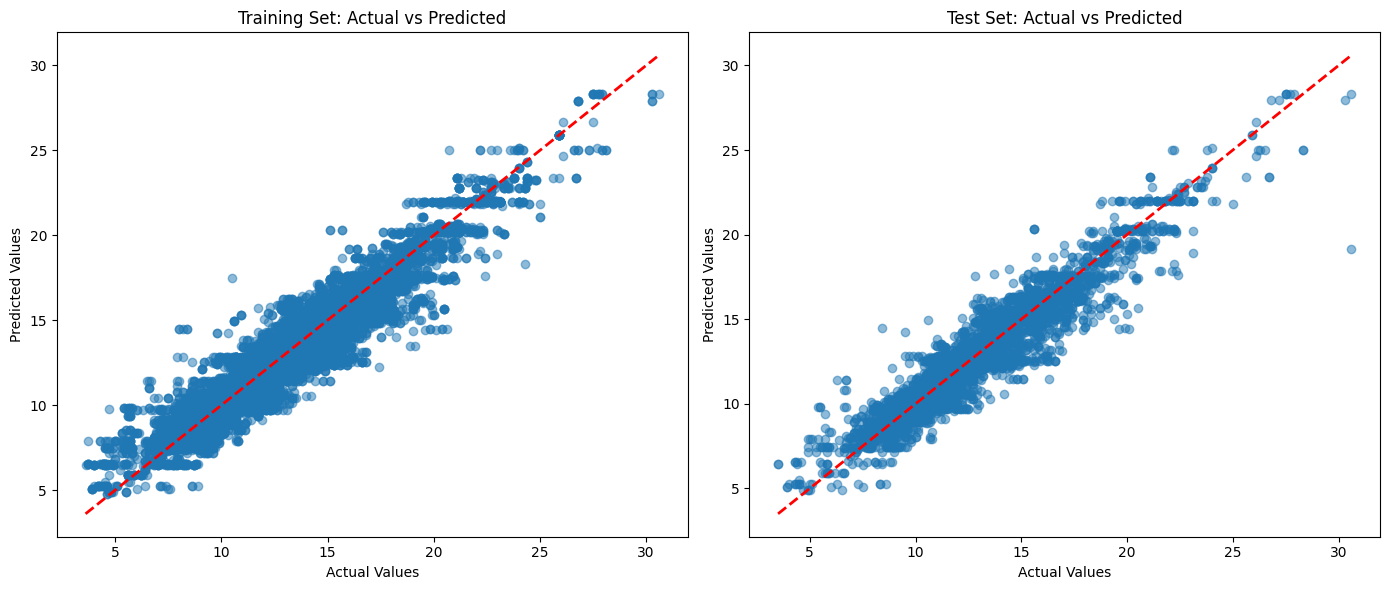

In [213]:

# Plot actual vs predicted for the training set
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Training Set: Actual vs Predicted')

# Plot actual vs predicted for the test set
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Test Set: Actual vs Predicted')

plt.tight_layout()
plt.show()

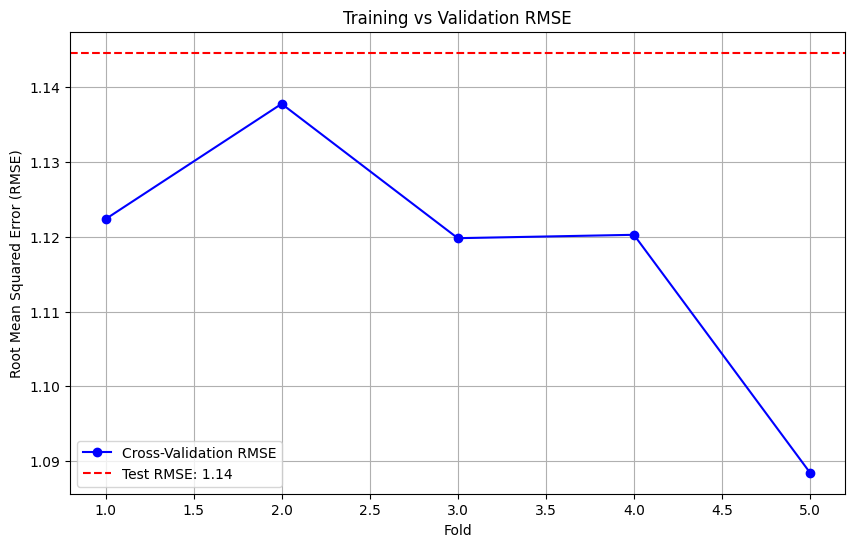

In [200]:
# Plot training (cross-validation) vs test errors
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), rmse_cv, label="Cross-Validation RMSE", marker='o', linestyle='-', color='b')
plt.axhline(y=test_rmse, color='r', linestyle='--', label=f'Test RMSE: {test_rmse:.2f}')
plt.xlabel('Fold')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Training vs Validation RMSE')
plt.legend()
plt.grid(True)
plt.show()